# Problem 5.31

## Problem Statement

Consider a cart on a spring with natural frequency $\omega_0 = 2 \pi$, which is released from rest at $x_0 = 1$ and $t=0$. Using appropriate graphing software, plot the position $x(t)$ for $0<t<2$ and for damping constants $\beta = 0,1,2,4,6,2\pi, 10,$ and $20$.

## Setting up the Problem



| $\beta$ Value     | Equation of Motion |
| ------------------|----------------------------------|
|$\beta < \omega_0$ | $$ x(t) = Ae^{-\beta t}cos(\omega_1 t - \delta)$$|
|$\beta > \omega_0$ | $$ x(t) = C_1 e^{-\biggl( \beta - \sqrt{\beta^2 - \omega_0^2}\biggr) t} + C_2e^{-\biggl( \beta+\sqrt{\beta^2-\omega_0^2}\biggr) t}$$ |
|$\beta = 0$        | $$ x(t) = C_1e^{i\omega_0t} + C_2e^{-i\omega_0t} $$ |
|$\beta = \omega_0$ | $$ x(t) = C_1e^{-\beta t} + C_2 t e^{-\beta t} $$ |
 

We will use all of these forms of the equations. But first we need to find the constants for each equation, based on the initial values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = np.arange(0, 2, 0.01)


## Equation 1 (Underdamping)
For the first equation, we know that the $A$ value is $1$ because the object is released from rest at $t=0$ which implies that $e^{-\beta t} = 1$ and $cos(..) = 1$ and we are also told that $x_0 = 1$ which means that the whole product would just be $A \times 1 \times 1 = 1 \implies A = 1$. Additionally, $\omega_1$ is defined as $\sqrt{\omega_0^2 - \beta^2}$. So, the final equation we get is:

$$ x(t) = e^{-\beta t}cos(\sqrt{4\pi^2 - \beta^2} t)$$

In [3]:
def underdamped(beta):
    omega = np.sqrt(4*np.pi**2 - beta**2)
    return [np.exp(-beta*T)*np.cos(omega*T), beta]

## Equation 2 (Overdamping)
For the second equation, since the exponential functions are $1$ at $t=0$ and the function is $x(0) = 1 \implies C_1 + C_2 = 1$. Since it is realeased from rest, we can take the derivitive at $t=0$ and find that $C_1 \times -( \beta - \sqrt{\beta^2 - 4\pi^2}) + C_2 \times -( \beta+\sqrt{\beta^2-4\pi^2}) = 0$. Put together, our system of equtions looks like so: 
<br></br>

$$
\begin{pmatrix}
1 & 1  \\
-\beta + \sqrt{\beta^2 - 4\pi^2} & -\beta - \sqrt{\beta^2 - 4\pi^2} 
\end{pmatrix}
\begin{pmatrix}
C_1 \\ C_2
\end{pmatrix} =
\begin{pmatrix}
1 \\ 0
\end{pmatrix}
\implies 
C_1 = \frac{\beta + \sqrt{\beta^2 - 4\pi^2}}{2\sqrt{\beta^2-4\pi^2}}, \space
C_2 = \frac{-\beta + \sqrt{\beta^2 - 4\pi^2}}{2\sqrt{\beta^2-4\pi^2}}
$$

Putting this all together, we end up with this function which only depends on beta and time:

$$ x(t) = \frac{\beta + \sqrt{\beta^2 - 4\pi^2}}{2\sqrt{\beta^2-4\pi^2}}e^{-\biggl( \beta - \sqrt{\beta^2 - 4\pi^2}\biggr) t} + \frac{-\beta + \sqrt{\beta^2 - 4\pi^2}}{2\sqrt{\beta^2-4\pi^2}}e^{-\biggl( \beta+\sqrt{\beta^2-4\pi^2}\biggr) t}$$



In [4]:
def overdamped(beta):
    const = np.sqrt(beta**2 - 4*np.pi**2)
    C1 = (beta + const)/(2*const)
    C2 = (const - beta)/(2*const)
    exp1 = np.exp(-(beta - const)*T)
    exp2 = np.exp(-(beta + const)*T)
    return [C1*exp1 + C2*exp2, beta]


## Equation 3 (No Damping)
Following the same trend for equation 3, using the initial values, we can determine that 

$$ 
\begin{pmatrix}
1 & 1 \\
i2\pi & -i2\pi
\end{pmatrix}
\begin{pmatrix}
C_1 \\ C_2
\end{pmatrix} =
\begin{pmatrix}
1 \\ 0
\end{pmatrix}
\implies
C_1 = C_2 = \frac{1}{2}
$$

Putting it all together, our equation becomes:
$$ x(t) = 0.5e^{i2\pi t} + 0.5e^{-i2 \pi t} $$


In [5]:
def nodamping(beta = 0):
    return [np.real(0.5*np.exp(2*np.pi*T*complex(0, 1)) + 0.5*np.exp(2*np.pi*T*complex(0, -1))), beta]

## Equation 4 (Critical Damping)

And finally, the last situation, where $\beta = \omega_0$, our initial values imply that 
$$
\begin{pmatrix}
1 & 0 \\
-\beta & 1
\end{pmatrix}
\begin{pmatrix}
C_1 \\ C_2
\end{pmatrix} =
\begin{pmatrix}
1 \\ 0
\end{pmatrix}$$

This is pretty straightforward. $C_1 = 1$ and $C_2 = \beta$. Knowing that $\beta = 2\pi$, our equation becomes:

$$
x(t) = e^{-2\pi t} + 2\pi t e^{-2\pi t}
$$

In [6]:
def critdamped(beta = np.pi*2):
    return [np.exp(-2*np.pi*T) + 2*np.pi*T*np.exp(-2*np.pi*T), "2π"]

## Graphing the Result

So, now we have all the equations of motion based on these initial values. Very importantly, the functions only depend on $\beta$ and time. This means that we can formulate the functions very easily in our code. 

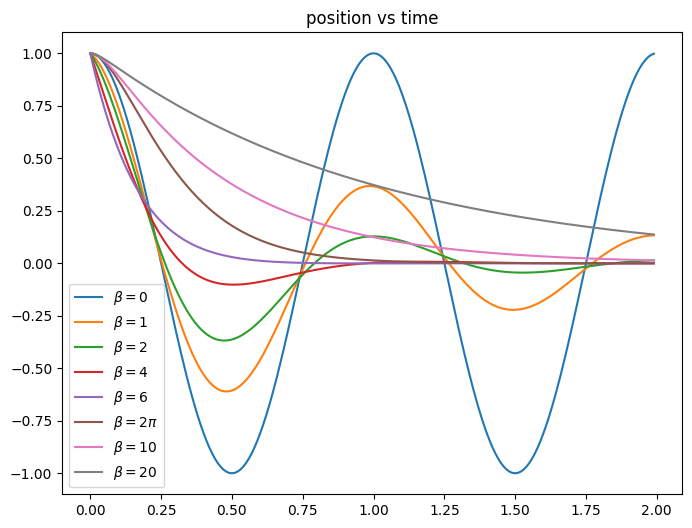

In [7]:
# beta = 0,1,2,4,6,2pi,10,20
FUNCS = [nodamping(), underdamped(1), underdamped(2), underdamped(4), underdamped(6), critdamped(), overdamped(10), overdamped(20)]
plt.figure(figsize = [8, 6])
for FUNC in FUNCS:
    f = FUNC[0]
    beta = FUNC[1]
    lbl = f"$\\beta = {beta}$"
    plt.plot(T, f, label=lbl)
plt.title("position vs time")
plt.legend(loc = "lower left")